# ORIE 4580/5580/5581 Assignment 5

#### Students: Sofia Paredes (smp343) and Maddi Klancher (mrk256)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Friday, October 13, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 8 (all parts) and 9 (up to Section 9.2 for the midterm) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [25]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.special import factorial
from scipy.stats import chisquare
import math
import scipy.stats as st




---
---


# Question 1: Red-Tailed Hawks! (15 points)

(Dedicated to [Big Red and Arthur](https://www.youtube.com/watch?v=diIn5tc8AJo), and their amazing family!)

A School of Ornithology researcher wants to estimate the number of red-tailed hawks in Ithaca. She radio tags 10 birds, and then sets up a feeding station with automatic camera.

The researcher believes that each individual bird's visits to the feeder can be modeled as a *Poisson process* with some unknown rate $\lambda$; we will talk more about the Poisson process in detail later in the semester (for a quick refresher, see Section 2.9.4 of Ross), but for this question, the main thing you need to know is that this is a process that counts a discrete number of arrivals, where the *inter-arrival* between one arrival and the next is independent and identically distributed as an Exponential$(\lambda)$ random variable (similar to the trains in question 5b in the previous assignment).

**(a)**
Over the first five weeks, the researcher observes an average of 28.8 birds (tagged and untagged) visiting the feeder, with an average of 6 tagged birds per week. Use the method of moments to obtain an estimate for the total population.

___
## Ans.

This problem can be modeled as a Poisson process with parameter $\lambda$ * $p$ where $p = $ probability $= \frac{10}{n}$. Since the average is 6 tagged birds per week, we know that $\lambda * p = 6 = \lambda * \frac{10}{n}$, so $\lambda = 28.8$, which means that $n = 48$.

Using the method of moments, we find an estimate for the total Ithaca red-tailed hawks population to be $48$. 

___

**(b)** Next, the researcher develops a video processing program which can identify and distinguish different individual birds from their pictures. Using this, over the next week, she observes 20 unique birds visiting the feeding station, out of which 4 are tagged. What is the MLE for the size of the hawk population in Ithaca?

___

## Ans.



___
___

# Question 2: Soup for Lunch? (15 points)

The folks at the [Temple of Zeus](https://as.cornell.edu/about/temple-of-zeus) have the best soup offerings at Cornell -- however, by the time you are done with Simulation, they often run out of soup. To remedy this, you want to try and understand the demand for soup, so that you can suggest how much they should make. You decide to model the total demand $N$ for soups each day as a geometric random variable with parameter $p$ (i.e., $P(N = k) = (1-p)^kp$, $k \ge 0$).

The Temple of Zeus manager gives you data for the number of lunches sold in the last $100$ days. One problem though is that the data is *censored*: the staff prepared soup for at most $40$ servings each day, and as a result, the number of sales each day is between 0 and 40. As a result, on days when the number of soups sold is $40$, you cannot be sure what the true demand $N_i$ was (but you know $N_i\geq 40$); on other days, the number of soups sold is the true demand $N_i<40$.

___

**(a)**
What is the probability mass function of the per-day sales $Y$ in terms of $p$?
___


## Ans.


Probability mass function of the per-day sales $Y$ in terms of $p$:

\begin{align*}
Y =
\begin{cases}
(1-p)^x * p &\mbox{for $0 \leq x \leq39 $} \\
(1 - p)^{40} & \mbox{for $x = 40$} \\
0 & \mbox{else} 
\end{cases}
\end{align*}

___

**(b)** Compute a maximum likelihood estimator of $p$ based on the sales data for soup given in `Soup_sales_data.csv`.
___

In [4]:
soup = pd.read_csv('Soup_sales_data.csv')

sales = soup['Y']

def likelihood(p):
    total = 0 
    for sale in sales: 
        if sale < 40:
            total += np.log((1-p) ** sale * p + 1e-10)
        else:
            total += np.log((1-p) ** 40 + 1e-10)
    
    return -total

first_guess = .5
result = minimize(likelihood, first_guess, bounds = [(0,1)])

mle = round(result.x[0], 3)
print('The maximum likelihood estimator (MLE) for p is: ' + str(mle))

The maximum likelihood estimator (MLE) for p is: 0.027


## Ans.


___
___

# Question 3: The Birthday Paradox (40 pts)

In this question, we investigate the celebrated [birthday paradox](https://en.wikipedia.org/wiki/Birthday_problem)!

___

**(a)** The basic question you may have seen in earlier probability courses is the following: given a party of $n$ people whose birthdays are drawn uniformly over the $365$ days in the year, what is the probability that at least two people share a birthday. Derive an expression for the probability, and plot it for $n\in\{10,11,12,\ldots,49,50\}$.
___

## Ans.
For the $n^{th}$ person to enter the party, there are $365-(n-1) = 366-n$ days remaining out of $365$ to have a unique birthday

$P(\text{no one shares a birthday}) = (\frac{365}{365})*(\frac{364}{365})*(\frac{363}{365})*...*(\frac{366-n}{365})$

$P(\text{at least two people share a birthday}) = 1-P(\text{no one shares a birthday})$

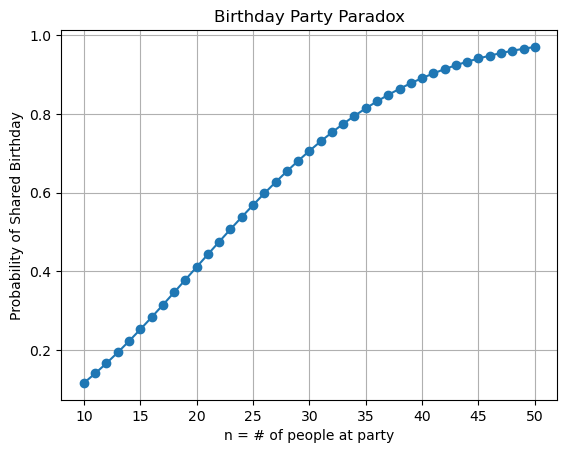

In [21]:
n_values = []
probs = []

for i in range(10,51):  
    prob_share = 1.0
    prob_no_share = 1.0
    
    for j in range(i):
        prob_no_share = prob_no_share*(365-j)/365
    
    prob_share = 1-prob_no_share
    
    n_values.append(i)
    probs.append(prob_share)

# create plot 
plt.plot(n_values, probs, marker='o')
plt.title("Birthday Party Paradox")
plt.xlabel('n = # of people at party')
plt.ylabel('Probability of Shared Birthday')
plt.grid(True)
plt.show()


___
**(b)** Next, we want to obtain the above probabilities by simulation. For a given $n$, perform simulations so as to estimate the probability  of at least two people sharing birthdays in a group of $n$, for $n\in\{15,16,\ldots,30\}$, up to $2$ decimal places (with $95\%$ confidence). Plot the estimates and $95\%$ CI, and also plot the theoretical result from part $(a)$ in the same plot.
___

## Ans.

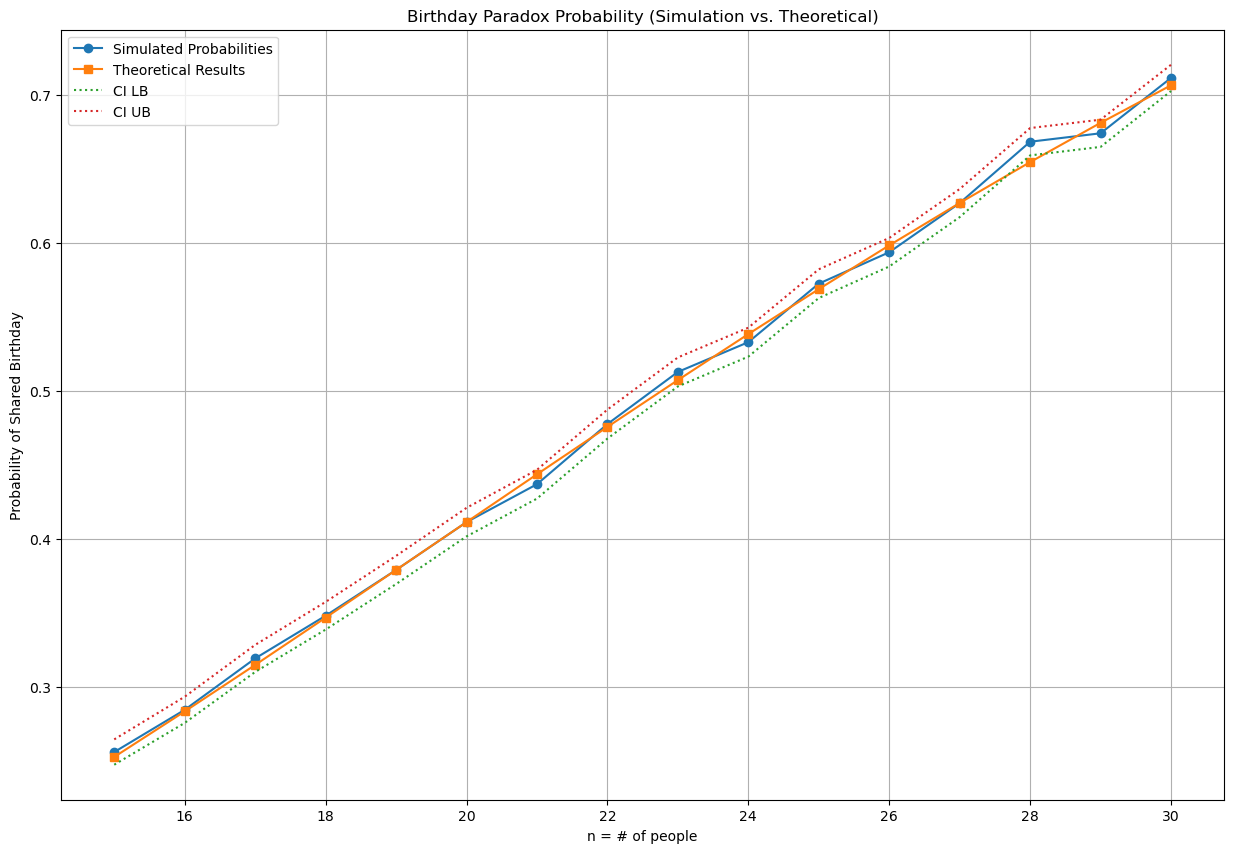

In [22]:
n_sim = 10000
n_values = list(range(15,31))

count_shared_bdays_arr = []

simulation_results = []
theoretical_results = []

LB_arr = []
UB_arr = []

# function to perform a simulation for the bday paradox w/ given party of n 
def simulate_bday_paradox(n, n_sim):
    count_shared_bdays_arr = []
    for i in range(n_sim):
        count_shared_bdays = 0
        bdays = np.random.randint(1,366,n)
        # identify any duplicate birthdays
        if len(bdays) != len(set(bdays)):
            count_shared_bdays += 1
        count_shared_bdays_arr.append(count_shared_bdays)
        
    # calculate avg & std # of shared bdays for party of size n 
    mean_sim_shared = np.mean(count_shared_bdays_arr)
    std_sim_shared = np.std(count_shared_bdays_arr)
    
    # 95% CI
    LB = mean_sim_shared - 1.96*(std_sim_shared/np.sqrt(n_sim))
    UB = mean_sim_shared + 1.96*(std_sim_shared/np.sqrt(n_sim))
    
    LB_arr.append(LB)
    UB_arr.append(UB)
    
    return mean_sim_shared


# plot simulated probabilities
for i in n_values:
    
    # simulated values
    sim_prob = simulate_bday_paradox(i,n_sim)
    # up to 2 decimal places
    round(sim_prob,2)
    simulation_results.append(sim_prob)
    
    # theoretical values (from a.)
    prob_no_share = 1
    for j in range(i):
        prob_no_share = prob_no_share*(365-j)/365
    prob_share = 1-prob_no_share
    theoretical_results.append(prob_share)

plt.figure(figsize=(15, 10))
plt.plot(n_values, simulation_results, label='Simulated Probabilities', marker='o', linestyle='-')
plt.plot(n_values, theoretical_results, label='Theoretical Results', marker='s',linestyle='-')


# plot CI
plt.plot(n_values, LB_arr, label='CI LB', linestyle='dotted')
plt.plot(n_values, UB_arr, label='CI UB', linestyle='dotted')


plt.title('Birthday Paradox Probability (Simulation vs. Theoretical)')
plt.xlabel('n = # of people')
plt.ylabel('Probability of Shared Birthday')
plt.legend()
plt.grid(True)
plt.show()



---

**(c)** One flaw in our analysis is that birth-dates may not be uniformly distributed throughout the year. To check this, we can look at data of real birth-dates.

The file `bdaydata.txt` has a list of $365$ days in the year (excluding February $29$) and the corresponding number of birthdays on that date. Load the dataset and plot the following:

i. Empirical histogram of the data

ii. Empirical cdf

iii. Q-Q plot comparing the data to a uniform distribution

(Dataset based on life insurance data from 1981-94; data and example courtesy [Roy Murphy](http://www.panix.com/~murphy/bday.html).)
___

## Ans.

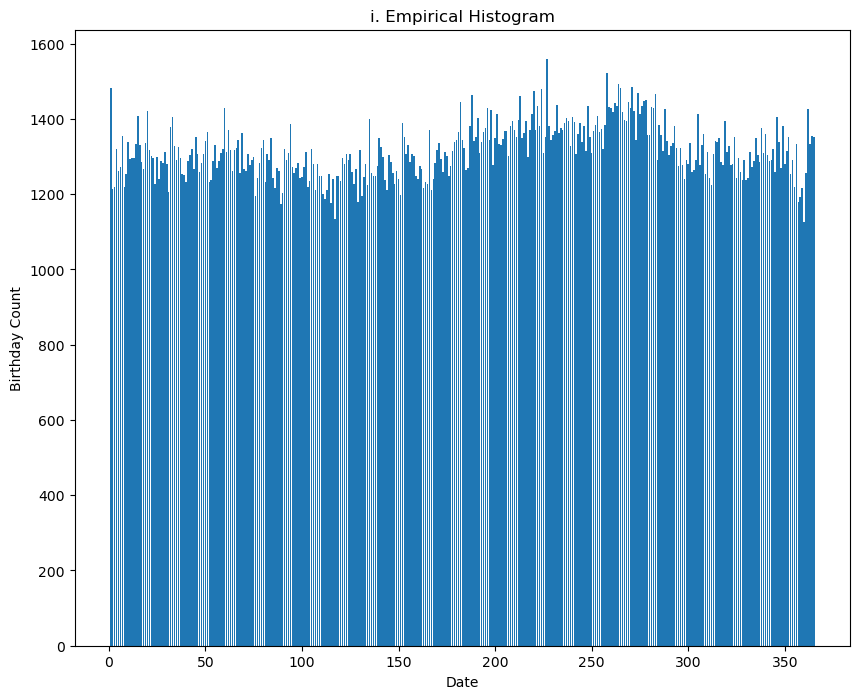

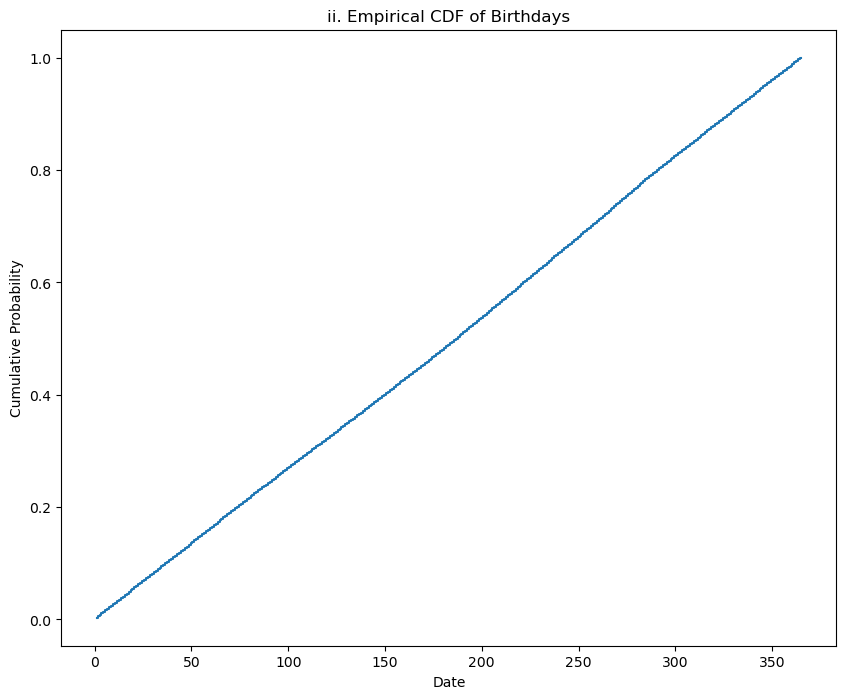

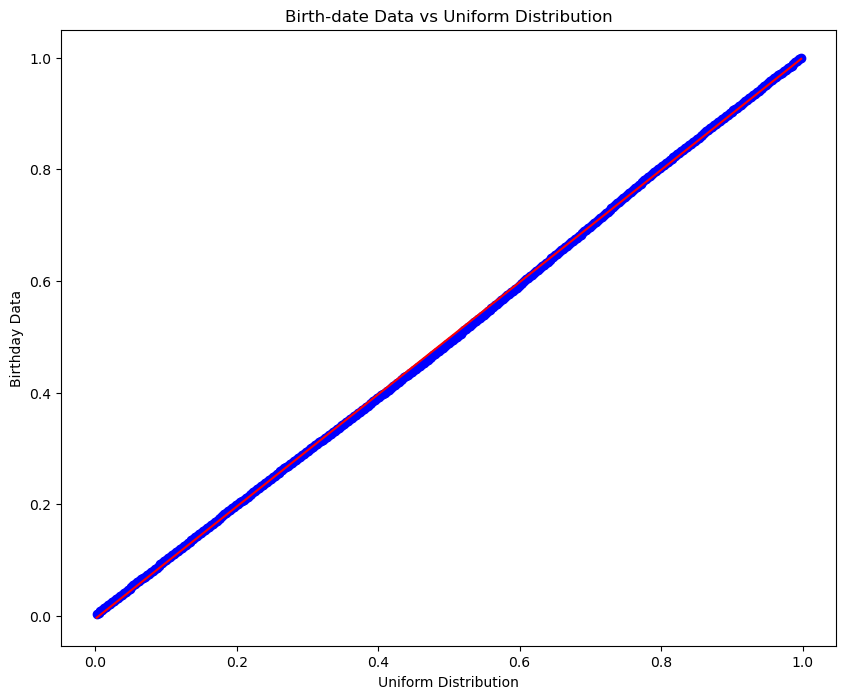

In [26]:
# For loading the data, you can use "df = pd.read_csv('bdaydata.txt',sep=' ')"
# Please note that the txt file needs to be placed in the same folder with the ipynb file.
# To extract the counts column as a vector, use "df.values[:,1]"

# Create a figure for plotting
plt.figure(figsize=[10, 8])

df = pd.read_csv('bdaydata.txt', sep=' ')

# i. empirical histogram
df['date'] = range(1,366)
dates = df['date']
count = df['count']

plt.bar(dates, count)
plt.xlabel('Date')
plt.ylabel('Birthday Count')
plt.title('i. Empirical Histogram')
plt.show()

# ii. empirical cdf
plt.figure(figsize=[10, 8])
count_arr = df.values[:, 1]
bdays_total = np.sum(count_arr)
cdf = np.cumsum(count_arr) / bdays_total

plt.step(range(1, 366), cdf, where='mid', label='Empirical CDF')
plt.xlabel('Date')
plt.ylabel('Cumulative Probability')
plt.title('ii. Empirical CDF of Birthdays')
plt.show()

# iii. Q-Q plot comparing the data to a uniform distribution
plt.figure(figsize=[10, 8])
uniform_dist = np.random.uniform(0, 1, len(cdf))

st.probplot(cdf, dist='uniform', plot=plt)
plt.xlabel('Uniform Distribution')
plt.ylabel('Birthday Data')
plt.title('Birth-date Data vs Uniform Distribution')
plt.show()


___

**(d)** Perform a Chi-square Test **and** a Kolmogorov-Smirnov Test to study how well the data is modeled by a uniform distribution.

___

## Ans.


In [27]:
# create uniform distribution
n = len(df['count'])
uniform_dist = np.random.uniform(0, 1, n)

# Chi-square Test
chi_stat, chi_p = st.chisquare(df['count'])
print(f"Chi-Square Statistic: {chi_stat}")
print(f"Chi-Square p-value: {chi_p}")

# Kolmogorov-Smirnov Test
ks_stat, ks_p = st.kstest(df['count'], 'uniform')
print(f"K-S Statistic: {ks_stat}")
print(f"K-S p-value: {ks_p}")

Chi-Square Statistic: 1352.7233599950073
Chi-Square p-value: 1.2489373800065057e-113
K-S Statistic: 1.0
K-S p-value: 0.0


___

**(e)** Since you have an extensive dataset of birthday frequency, you can directly use the nonparametric bootstrap to estimate the probability of at least two people sharing birthdays in a group of $n$. Plot the bootstrap estimate and $95\%$ CI for $n\in\{15,16,\ldots,30\}$, and compare against the plot in part $(b)$.

___

## Ans.


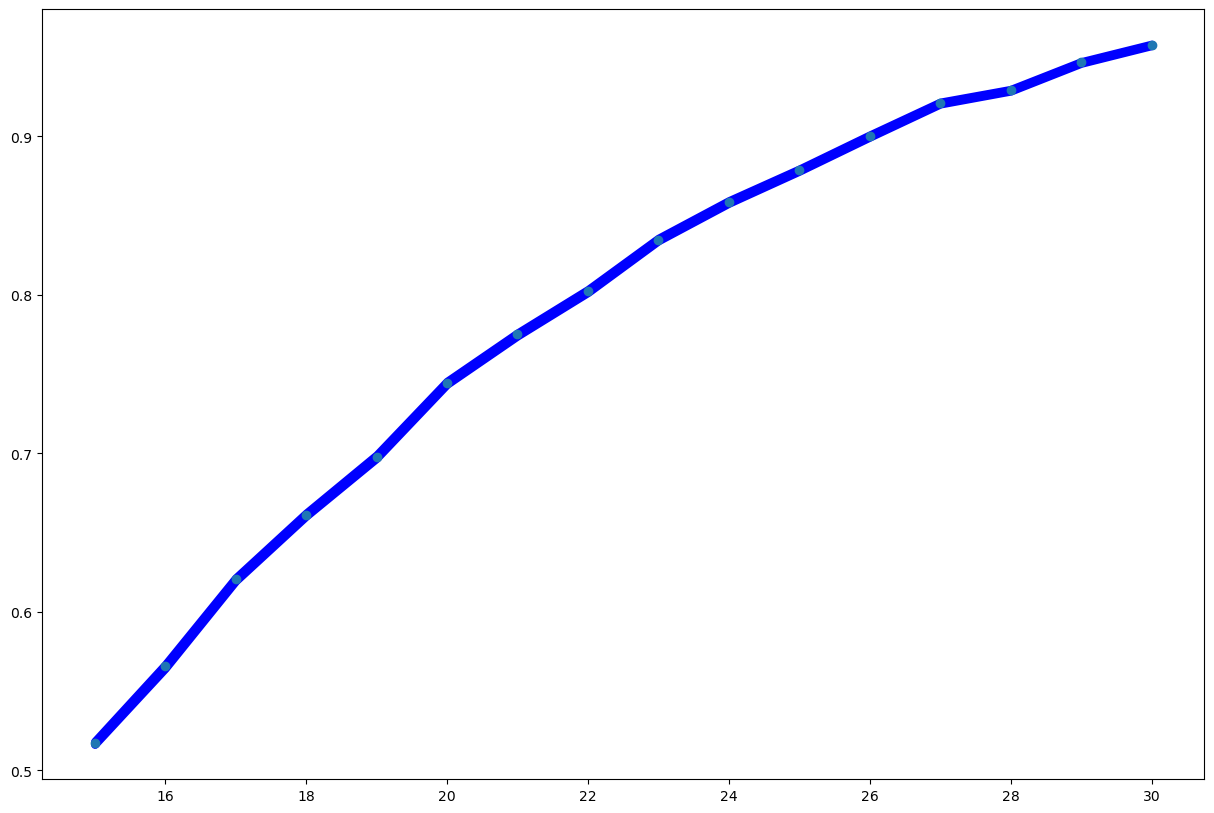

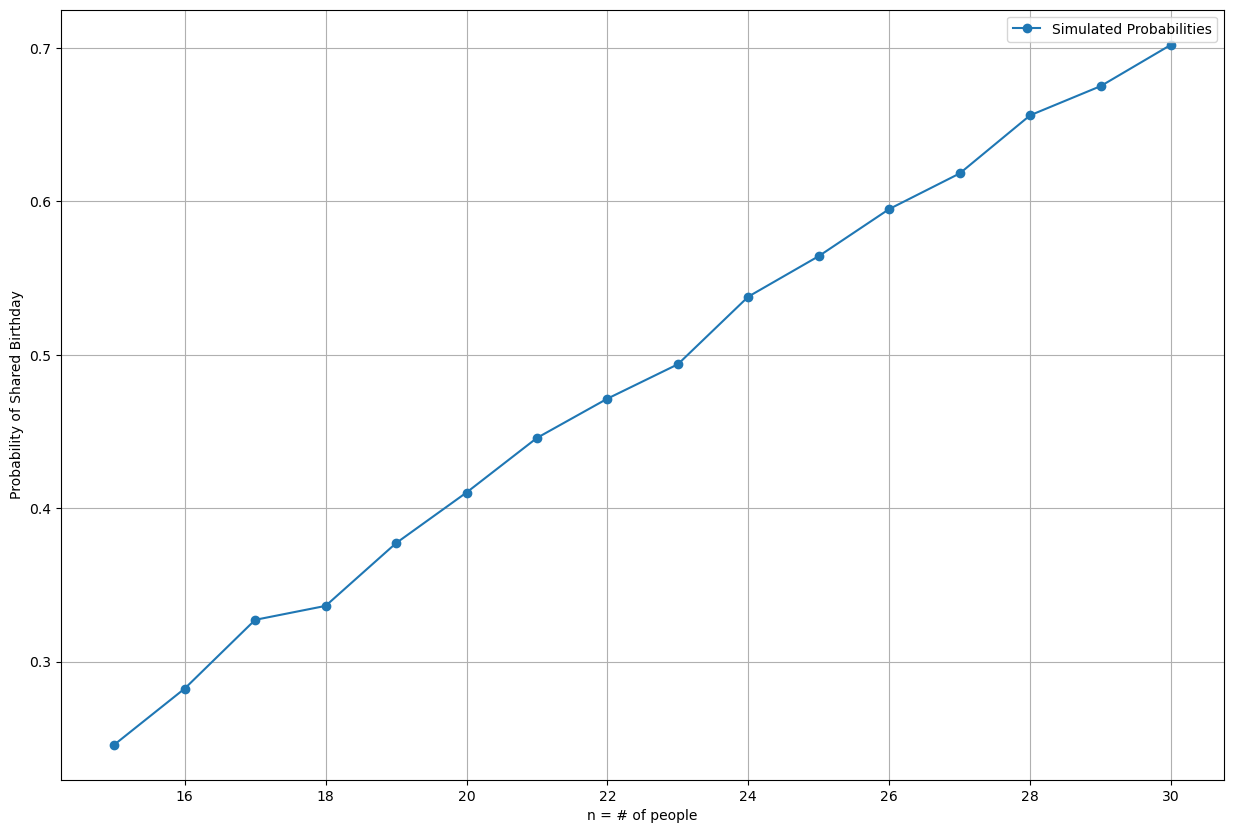

In [28]:
n_sim = 10000
n_values = list(range(15,31))
count_arr = df['count'].values

mean_arr = []
LB_arr = []
UB_arr = []

for i in n_values:
    count_bday_shared = 0
    bootstrap_arr = []
    
    for j in range(100):
        count_bday_shared = 0
        for k in range(100):
            sample = np.random.choice(count_arr, size=i, replace=True)
            if len(sample) != len(set(sample)):
                count_bday_shared += 1
        p = count_bday_shared/100
        bootstrap_arr.append(p)
        
    mean = np.mean(bootstrap_arr)
    std = np.std(bootstrap_arr, ddof=1)
    LB = mean - 1.96*(std/np.sqrt(n_sim))
    UB = mean + 1.96*(std/np.sqrt(n_sim))
    
    LB_arr.append(LB)
    UB_arr.append(UB)
    
    mean_arr.append(mean)

plt.figure(figsize=(15, 10))            
plt.fill_between(n_values, UB_arr, LB_arr, color = 'blue', linewidth = 6)
plt.scatter(n_values,mean_arr)

count_shared_bdays_arr = []
simulation_results = []


# function to perform a simulation for the bday paradox w/ given party of n 
def simulate_bday_paradox(n, n_sim):
    count_shared_bdays_arr = []
    for i in range(n_sim):
        count_shared_bdays = 0
        bdays = np.random.randint(1,366,n)
        # identify any duplicate birthdays
        if len(bdays) != len(set(bdays)):
            count_shared_bdays += 1
        count_shared_bdays_arr.append(count_shared_bdays)
        
    # calculate avg & std # of shared bdays for party of size n 
    mean_sim_shared = np.mean(count_shared_bdays_arr)
    std_sim_shared = np.std(count_shared_bdays_arr)

    return mean_sim_shared


# plot simulated probabilities
for i in n_values:
    
    # simulated values
    sim_prob = simulate_bday_paradox(i,n_sim)
    # up to 2 decimal places
    round(sim_prob,2)
    simulation_results.append(sim_prob)

    
plt.figure(figsize=(15, 10))
plt.plot(n_values, simulation_results, label='Simulated Probabilities', marker='o', linestyle='-')


plt.xlabel('n = # of people')
plt.ylabel('Probability of Shared Birthday')
plt.legend()
plt.grid(True)


plt.show()

___
___

# Question 4: Benford's Law (30 pts)

In this question, we will use the Chi-square test to study *Benford's law* in a variety of setttings. Consider a data set consisting of $n$ different numbers, and look at the leading digit of each number (for example, the leading digit of $123.456$ is $1$, and the leading digit of $-0.423$ is $4$). For many data sets, the fraction of leading digits that equal $1$ is much higher than $1/9$ (i.e., what it would be if uniformlly distributed); in fact, the probability distribution of the different leading digits $1, 2, \ldots, 9$ is far from uniform.

This observation has been observed to hold in measurements of distances to galaxies, numbers appearing in tax forms and many other settings, and has been used to detect fraud among other uses. See [the Wikipedia page](https://en.wikipedia.org/wiki/Benford\%27s_law) for a description of this phenomena, and [this blog post](https://terrytao.wordpress.com/2009/07/03/benfords-law-zipfs-law-and-the-pareto-distribution/) for an interesting related discussion. More recently, this has also been (supposedly) misused in (supposedly) detecting (supposed) fraud in election results -- see [this Stand-Up Maths](https://www.youtube.com/watch?v=etx0k1nLn78&t=4s) video for a great example of how data analysis should be done!



___

**(a)** First, we will study this phenomena in a *synthetic* dataset. For this, compute the first digits of $n!$ for the first $1500$ integers, and plot their empirical histogram. You can use the code fragment provided to generate the first $n$ factorials.
___


## Ans.

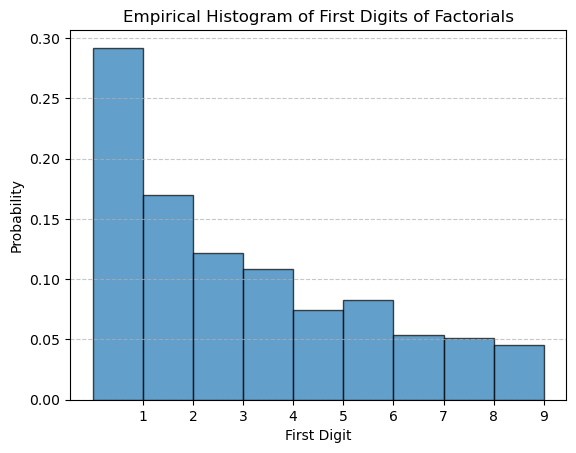

In [12]:
n = 1500

series = factorial(np.arange(n), exact = True)
first = np.zeros(n)

for num in range(n):
    first[num] = int(str(series[num])[0])

hist, bins = np.histogram(first, bins = np.arange(1, 11) - .5, density = True)

plt.bar(bins[:-1], hist, width = 1, alpha = .7, edgecolor = 'black')
plt.xlabel('First Digit')
plt.ylabel('Probability')
plt.title('Empirical Histogram of First Digits of Factorials')
plt.xticks(range(1,10))
plt.grid(axis = 'y', linestyle = '--', alpha = .7)
plt.show()

___
**(b)** Use a Chi-square test to determine how well the data can be modeled using a uniform distribution.

___


## Ans.

In [13]:
observed = hist * n
expected = n/9

chi_squared, p = chisquare(observed, f_exp = expected)

print('Chi-square statistic: ' + str(chi_squared))
print('p-value: ' + str(p))

alpha = .05
if p < alpha: 
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Chi-square statistic: 670.8000000000002
p-value: 1.3805718582880795e-139
Reject the null hypothesis


___

**(c)** Next, use a Chi-square test to test how well the data is modeled using the 'Benford's Law' distribution:
$$p(d)= \log _{10}(d+1)-\log _{10}(d), \quad d\in\{1,2,\ldots,9\}$$


___

In [17]:
def benford(d):
    result = math.log10(d+1) - math.log10(d) 
    return result

expected = []
for i in range(1, 10):
    expected.append(benford(i) * sum(observed))
    
chi_squared, p = chisquare(observed, expected)
print('Chi-squared score value: ' + str(chi_squared))
print('p-value: ' + str(p))

if p < .05: 
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Chi-squared score value: 9.456569118464644
p-value: 0.30525483396067576
Fail to reject the null hypothesis


___

**(d)** Finally, we will repeat this analysis with a more natural dataset. The dataset `us_pop.csv` contains the US population in 100,000 different zip codes in the year 2010, and the numbers range from less than ten to almost 100,000. As above, compute the histogram of the leading digits, and use the Chi-square test to see how well the data is modeled via the uniform and the Benford's law distributions.
___

## Ans.

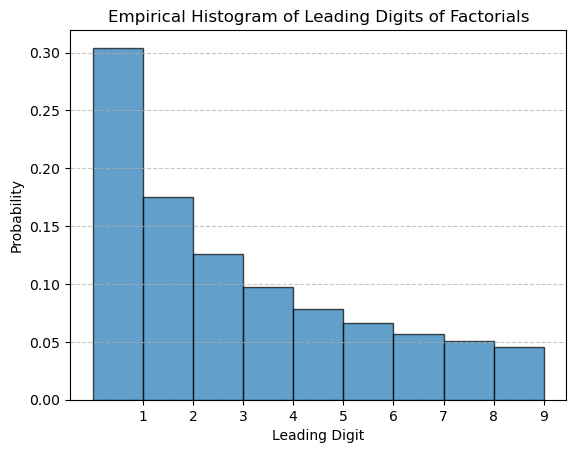

In [18]:
pop = pd.read_csv('us_pop.csv')
leading = pop['population'].astype(str).str[0].astype(int)
hist, bins = np.histogram(leading, bins = np.arange(1,11) - .5, density = True)

plt.bar(bins[:-1], hist, width = 1, alpha = .7, edgecolor = 'black')
plt.xlabel('Leading Digit')
plt.ylabel('Probability')
plt.title('Empirical Histogram of Leading Digits of Factorials')
plt.xticks(range(1,10))
plt.grid(axis = 'y', linestyle = '--', alpha = .7)
plt.show()

In [19]:
observed = hist * len(leading)
expected = len(leading) / 9
chi_squared, p = chisquare(observed, f_exp = expected)

print('Chi-squared score: ' + str(chi_squared))
print('p-value: ' + str(p))

if p < .05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Chi-squared score: 50323.53572
p-value: 0.0
Reject the null hypothesis


In [20]:
expected = []

for i in range(1, 10):
    expected.append(benford(i) * sum(observed))

chi_squared, p = chisquare(observed, expected)
print('Chi-squared score: ' + str(chi_squared))
print('p-value: ' + str(p))

if p < .05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Chi-squared score: 11.843226818110919
p-value: 0.15833698137849542
Fail to reject the null hypothesis


**(e) (Optional for all students)** To understand how the Benford's law distribution originates, the important idea is that when a random variable $X$ ranges over several orders (say between $0$ and $10^6$), then it is better modelled by saying that $\log_{10}(X)$ is uniformly distributed on interval $[0,6]$ (rather than $X$ being uniform on $[0,10^6]$. Using this, can you derive the the exact probabilities for each of the leading digits.